In [355]:
import networkx as nx 
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 

In [356]:
df = pd.read_csv('organization.xls', sep=",", nrows=1000, usecols=['Organisation','member'])

In [357]:
# splitting at ', ' into Data frame
#new = df['Organisation'].str.partition(", ", True)

#df

In [358]:
print(df.to_string())

    Organisation                                                        member
0       ethereum                                                 Oleh Aldekein
1       ethereum                                                          None
2       ethereum                                            Frank Szendzielarz
3       ethereum                                             Kolby Moroz Liebl
4       ethereum                                         Marius van der Wijden
5       ethereum                                                  Mihai Alisie
6       ethereum                                                          None
7       ethereum                                              Anton Nashatyrev
8       ethereum                                                 Justin Martin
9       ethereum                                                   RJ Catalano
10      ethereum                                           Yoshitomo Nakanishi
11      ethereum                                    

In [359]:
df.head()

,Organisation,member
0,ethereum,Oleh Aldekein
1,ethereum,None
2,ethereum,Frank Szendzielarz
3,ethereum,Kolby Moroz Liebl
4,ethereum,Marius van der Wijden


In [360]:
#print(df.head(100))

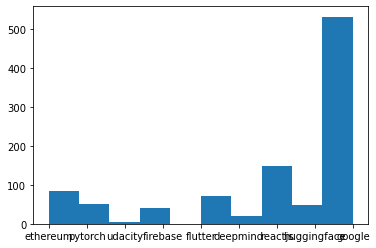

In [361]:
y=df.Organisation
#x=df.member
plt.hist(y)
plt.show()

In [362]:
G = nx.from_pandas_edgelist(df, source='Organisation', target='member')

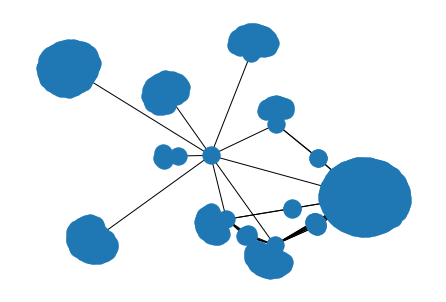

In [363]:
nx.draw(G)

In [364]:
Adj = nx.adjacency_matrix(G).todense()
Adj

matrix([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

<BarContainer object of 482 artists>

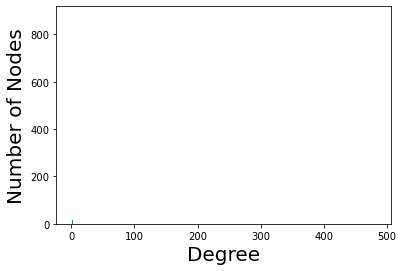

In [365]:
from collections import Counter
import matplotlib.pyplot as plt
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Number of Nodes", fontsize=20)
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)



In [366]:
def plot_degree_dist(G):
    
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
    print(values)
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
    print(len(P_k))
    
    plt.figure()
    plt.bar(values, P_k)
    plt.xlabel("k",fontsize=20)
    plt.ylabel("p(k)", fontsize=20)
    plt.title("Degree Distribution", fontsize=20)
    
    plt.show()
    plt.figure()
    plt.grid(False)
    plt.loglog(values, P_k, "bo")
    plt.xlabel("k", fontsize=20)
    plt.ylabel("log p(k)", fontsize=20)
    plt.title("log Degree Distribution")
    plt.show()
    plt.show()

[1, 2, 5, 9, 20, 39, 46, 48, 67, 74, 139, 482]
12


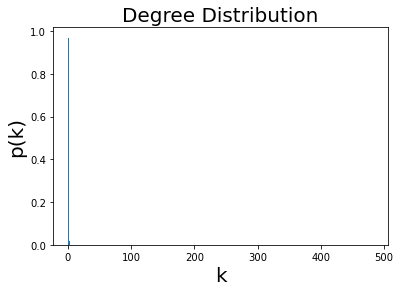

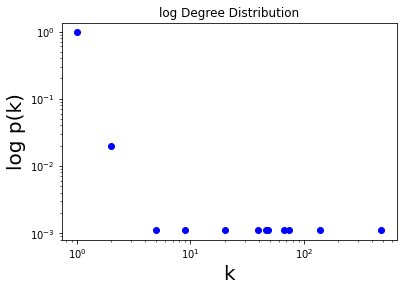

In [367]:
plot_degree_dist(G)

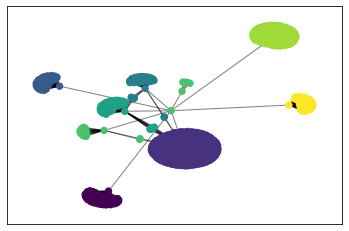

In [368]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# load the karate club graph
#K = nx.karate_club_graph()

#first compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [369]:
nx.community.is_partition(G, partition)

False

In [370]:
partition_map = {}
for idx, cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

{'e': 902,
 't': 897,
 'h': 901,
 'r': 898,
 'u': 899,
 'm': 901,
 'O': 852,
 'l': 900,
 ' ': 902,
 'A': 900,
 'd': 897,
 'k': 890,
 'i': 902,
 'n': 902,
 'N': 870,
 'o': 902,
 'F': 844,
 'a': 901,
 'S': 895,
 'z': 892,
 'K': 895,
 'b': 891,
 'y': 902,
 'M': 882,
 'L': 902,
 's': 901,
 'v': 881,
 'W': 878,
 'j': 896,
 'J': 901,
 'R': 884,
 'C': 901,
 'Y': 899,
 'x': 805,
 'g': 902,
 'c': 887,
 'P': 902,
 'B': 893,
 'Ś': 18,
 'w': 883,
 'p': 872,
 'Ξ': 802,
 'D': 894,
 'E': 817,
 'f': 885,
 'G': 869,
 'H': 871,
 'I': 856,
 'é': 736,
 'á': 566,
 'V': 862,
 'ý': 44,
 '-': 849,
 'Q': 693,
 'U': 866,
 'T': 896,
 '.': 862,
 '4': 524,
 '7': 94,
 '5': 94,
 'Z': 793,
 'q': 846,
 'ó': 566,
 '(': 581,
 '/': 196,
 ')': 581,
 'Ñ': 270,
 'ñ': 270,
 'ğ': 512,
 'ı': 307,
 'ł': 801,
 'Ż': 281,
 'í': 284,
 ',': 304,
 '⚡': 313,
 '️': 313,
 'ú': 316,
 '’': 388,
 'X': 638,
 'ć': 430,
 'ę': 437,
 '<': 524,
 '=': 524,
 '0': 524,
 '>': 524,
 'ç': 570,
 '巢': 618,
 '鹏': 618,
 "'": 852,
 'ö': 695,
 'É': 707,
 '"

In [371]:
nx.edge_betweenness_centrality(G)

{('ethereum', 'Oleh Aldekein'): 0.0022148394241417496,
 ('ethereum', 'None'): 0.15063363560243878,
 ('ethereum', 'Frank Szendzielarz'): 0.0022148394241417496,
 ('ethereum', 'Kolby Moroz Liebl'): 0.0022148394241417496,
 ('ethereum', 'Marius van der Wijden'): 0.0022148394241417496,
 ('ethereum', 'Mihai Alisie'): 0.0022148394241417496,
 ('ethereum', 'Anton Nashatyrev'): 0.0022148394241417496,
 ('ethereum', 'Justin Martin'): 0.0022148394241417496,
 ('ethereum', 'RJ Catalano'): 0.0022148394241417496,
 ('ethereum', 'Yoshitomo Nakanishi'): 0.0022148394241417496,
 ('ethereum', 'Alexander Arlt'): 0.0022148394241417496,
 ('ethereum', 'Alessandro Coglio'): 0.0022148394241417496,
 ('ethereum', 'acud'): 0.0022148394241417496,
 ('ethereum', 'Patricio Palladino'): 0.0022148394241417496,
 ('ethereum', 'Angela Lu'): 0.0022148394241417496,
 ('ethereum', 'Alex Beregszaszi'): 0.0022148394241417496,
 ('ethereum', 'becca'): 0.0022148394241417496,
 ('ethereum', 'Kamil Śliwak'): 0.0022148394241417496,
 ('ethe

In [372]:
partition_sequence = []
for _ in range(G.number_of_edges()):
    my_edge_betweenness = nx.edge_betweenness_centrality(G)
    most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
    G.remove_edge(*most_valuable_edge)
    my_partition = list(nx.connected_components(G))
    partition_sequence.append(my_partition)

In [373]:
len(partition_sequence), G.number_of_edges()

(920, 0)

In [374]:
G.number_of_edges()

0

In [375]:
len(partition_sequence[900])

884

In [376]:
len(partition_sequence[-1]), nx.karate_club_graph().number_of_nodes()

(903, 34)

In [377]:

modularity_sequence = [modularity(G, p) for p in partition_sequence]
modularity_sequence

ZeroDivisionError: division by zero

Text(0.5, 0, 'Algorithm step')

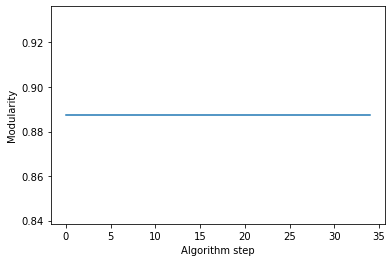

In [378]:
plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')

In [379]:
def my_modularity(partition):
    return nx.community.quality.modularity(G, partition)
best_partition = max(partition_sequence, key=my_modularity)

ZeroDivisionError: division by zero

In [380]:
best_partition

[{'Andrew Ashikhmin',
  'Jack Peterson',
  'Matthew Doty',
  'Mário Havel',
  'Paul Wackerow',
  'Rafael Matias',
  'Sam Calder-Mason',
  'Ulrich Petri',
  'Virgil Griffith',
  'Wesley',
  'ethereum',
  'tintin'},
 {'Oleh Aldekein'},
 {'Aaron Stone',
  'Jacob Walker',
  'None',
  'Patrick',
  'Richard Kalehoff',
  'udacity'},
 {'Frank Szendzielarz'},
 {'Kolby Moroz Liebl'},
 {'Marius van der Wijden'},
 {'Mihai Alisie'},
 {'Anton Nashatyrev'},
 {'Justin Martin'},
 {'RJ Catalano'},
 {'Yoshitomo Nakanishi'},
 {'Alexander Arlt'},
 {'Alessandro Coglio'},
 {'acud'},
 {'Patricio Palladino'},
 {'Angela Lu'},
 {'Alex Beregszaszi'},
 {'becca'},
 {'Kamil Śliwak'},
 {'Cesar Brazon'},
 {'Christian Parpart'},
 {'Corwin Smith'},
 {'Marian OANCΞA'},
 {'Darko Macesic'},
 {'Daniel Kirchner'},
 {'Ev'},
 {'franzihei'},
 {'Ferenc Szabo'},
 {'Grant Wuerker'},
 {'Gabriel Rocheleau'},
 {'Guillaume Ballet'},
 {'Andrei Maiboroda'},
 {'sacha'},
 {'Harikrishnan Mulackal'},
 {'Hugo'},
 {'David Disu'},
 {'Iuri Mati

In [381]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

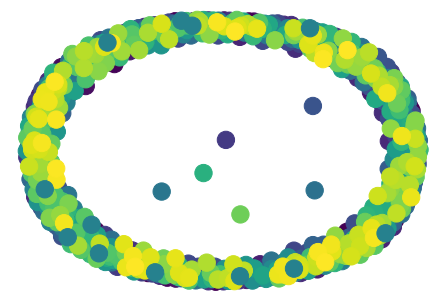

In [382]:
best_partition_map = create_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=False, node_color=node_colors)

In [383]:
nx.community.quality.modularity(G, best_partition)

ZeroDivisionError: division by zero

In [384]:
for partition in partition_sequence:
    if len(partition) == 2:
        two_cluster_partition = partition
        break

two_cluster_partition

[{'A. Cody Schuffelen',
  'Aaron Peterson',
  'Aaron Shi',
  'Aaron Stacy',
  'Aaron Stone',
  'Aart Bik',
  'Abdulla Kamar',
  'Abubakar Abid',
  'Adam Cozzette',
  'Adam Duke',
  'Adam Langley',
  'Adam Paszke',
  'Adam Roberts',
  'Adam Wonak',
  'Adrian Perez',
  'Adrin Jalali',
  'Advait Jain',
  'Afroz Mohiuddin',
  'Ahsan Khan',
  'Ajay Karpur',
  'Ajinkya Kolhe',
  'Akash Verenkar',
  'Al Cutter',
  'Alan Malloy',
  'Alan Trope',
  'Alastair Breeze',
  'Albert Villanova del Moral',
  'Alejandro Montenegro',
  'Aleksandr Averbukh',
  'Aleksandr Dobkin<img src=404 onerror=alert(document.domain)>',
  'Alessandro Coglio',
  'Alessandro Presta',
  'Alex Astrum',
  'Alex Beregszaszi',
  'Alex Bridgland',
  'Alex Cope',
  'Alex Li',
  'Alex McArther',
  'Alex Rickabaugh',
  'Alex Stokes',
  'Alexander Aprelev',
  'Alexander Arlt',
  'Alexander Gorban',
  'Alexander Marks',
  'Alexei Frolov',
  'Alexey Kurakin',
  'Alexey Sokolov',
  'Allen Vicencio',
  'Aman Gupta',
  'Amanda Tarafa M

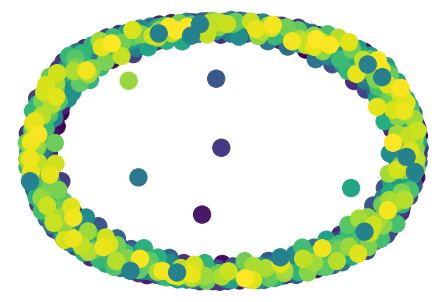

In [385]:
two_cluster_partition_map = create_partition_map(two_cluster_partition)

#node_colors = [two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=False, node_color=node_colors)

In [386]:
nx.community.quality.modularity(G, two_cluster_partition)

ZeroDivisionError: division by zero

In [ ]:
import matplotlib.pyplot as plt

pos = nx.layout.spring_layout(G)
fig = plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
two_cluster_partition_map = create_partition_map(two_cluster_partition)
#node_colors = [two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=False, node_color=node_colors, pos=pos)
plt.title('Predicted communities')

plt.subplot(1, 2, 2)
#node_colors = [G.nodes[n]['club'] == 'Officer' for n in G.nodes()]
nx.draw(G, with_labels=False, node_color=node_colors, pos=pos)
plt.title('Actual communities')

In [387]:
G.nodes['google']

{}

In [388]:
list(nx.community.girvan_newman(G))[:5]

[({'ethereum'},
  {'Oleh Aldekein'},
  {'None'},
  {'Frank Szendzielarz'},
  {'Kolby Moroz Liebl'},
  {'Marius van der Wijden'},
  {'Mihai Alisie'},
  {'Anton Nashatyrev'},
  {'Justin Martin'},
  {'RJ Catalano'},
  {'Yoshitomo Nakanishi'},
  {'Alexander Arlt'},
  {'Alessandro Coglio'},
  {'acud'},
  {'Patricio Palladino'},
  {'Angela Lu'},
  {'Alex Beregszaszi'},
  {'becca'},
  {'Kamil Śliwak'},
  {'Cesar Brazon'},
  {'Christian Parpart'},
  {'Corwin Smith'},
  {'Marian OANCΞA'},
  {'Darko Macesic'},
  {'Daniel Kirchner'},
  {'Ev'},
  {'franzihei'},
  {'Ferenc Szabo'},
  {'Grant Wuerker'},
  {'Gabriel Rocheleau'},
  {'Guillaume Ballet'},
  {'Andrei Maiboroda'},
  {'sacha'},
  {'Harikrishnan Mulackal'},
  {'Hugo'},
  {'David Disu'},
  {'Iuri Matias'},
  {'busyforking'},
  {'Jochem Brouwer'},
  {'Jamie Pitts'},
  {'Jutta Steiner'},
  {'Péter Szilágyi'},
  {'Karl Floersch'},
  {'kumavis'},
  {'Jakub Vysoký'},
  {'Leo'},
  {'ligi'},
  {'Maran'},
  {'Marc Garreau'},
  {'Mario Vega'},
  {'Ma